In [1]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from scipy.stats import norm
import matplotlib.pyplot as plt

In [4]:
path_it50 = 'plasmaboundaries_it50.xlsx'
path_it100 = 'plasmaboundaries_it100.xlsx'

In [5]:
df_it50 = pd.read_excel(path_it50, header=0, usecols=[2,3,4,5,6])
df_it100 = pd.read_excel(path_it100, header=0, usecols=[2,3,4,5,6])
df_it50.head()

,ka,k10,k12,k21,Vc
0,12.640344,0.139506,5.513311,3.224921,269.231907
1,7.221422,3.698524,1.249905,0.029671,3.644258
2,33.150533,1.031479,110.015243,4.896545,18.116222
3,8.958105,7.940724,14.209970,0.028449,1.375803
4,3.154047,2.328567,28.844824,0.843508,7.803584


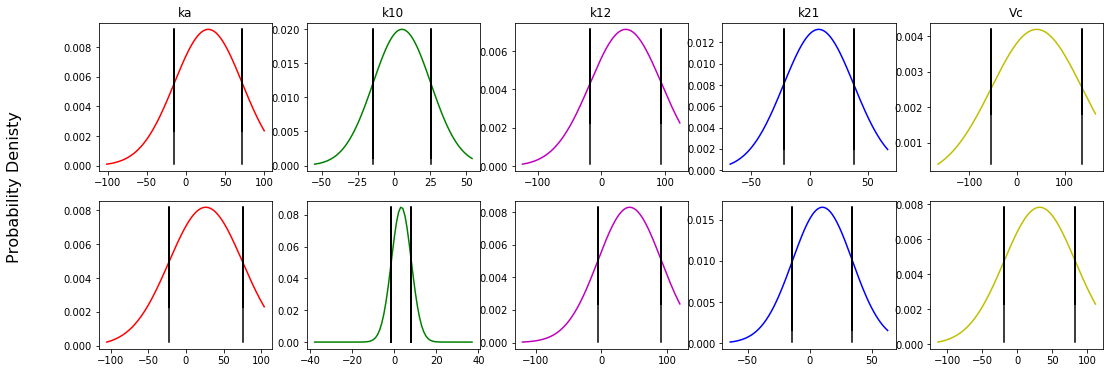

In [7]:
fig, axs = plt.subplots(2,5, figsize=(18, 6), facecolor='w', edgecolor='k')

l = ['ka', 'k10', 'k12', 'k21', 'Vc','ka', 'k10', 'k12', 'k21', 'Vc']
c = ['r-', 'g-', 'm-', 'b-', 'y-','r-', 'g-', 'm-', 'b-', 'y-']
axs = axs.ravel()

data = [df_it100, df_it50]

j=0
for i in range(len(l)):
    if i > 4: j=1
    else:  axs[i].set_title(l[i], fontsize=12)
    sample = data[j][l[i]].tolist()
    sample_mean = mean(sample)
    sample_std = std(sample)
    
    dist = norm(sample_mean, sample_std)
    # sample probabilities for a range of outcomes
    values = [value for value in range(-(int(sample_mean+sample_std)+30), int(sample_mean+sample_std)+30)]
    probabilities = [dist.pdf(value) for value in values]

    axs[i].plot(values, probabilities, c[i])
    axs[i].plot([sample_mean+sample_std]*len(probabilities),probabilities, 'k-')
    axs[i].plot([sample_mean-sample_std]*len(probabilities),probabilities, 'k-')

fig.text(0.06, 0.5, 'Probability Denisty', ha='center', va='center', rotation='vertical', fontsize=16);